In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
data =  pd.read_csv('energy_clean.csv').drop('Unnamed: 0',axis=1)

print(data.head())

  PrimaryPropertyType Neighborhood  Latitude  Longitude  YearBuilt  \
0               Hotel     DOWNTOWN  47.61220 -122.33799       1927   
1               Hotel     DOWNTOWN  47.61317 -122.33393       1996   
2               Hotel     DOWNTOWN  47.61393 -122.33810       1969   
3               Hotel     DOWNTOWN  47.61412 -122.33664       1926   
4               Hotel     DOWNTOWN  47.61375 -122.34047       1980   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                1.0              12             88434                   0   
1                1.0              11            103566               15064   
2                1.0              41            956110              196718   
3                1.0              10             61320                   0   
4                1.0              18            175580               62000   

   PropertyGFABuilding(s)  ...        Somme  Steamperc  Elecperc   Gasperc  \
0                   88434  ...  

Nous préparons les données pour le Machine Learning 

In [4]:
from sklearn.model_selection import train_test_split 

target = data['SiteEnergyUse(kBtu)']


In [5]:
data.head()
list_suppr =list_suppr=['YearBuilt_cat',
            'TotalGHGEmissions','SteamUse(kBtu)',
            'Electricity(kBtu)','NaturalGas(kBtu)','SiteEnergyUse(kBtu)','SourceEUI(kBtu/sf)',
            'Somme','Steamperc','Elecperc','Gasperc','Encoded_cat_building_emission',
            'Encoded_cat_use_emission','Encoded_cat_building_energy','Encoded_cat_use_energy']
X  = data.drop(list_suppr,axis=1)
y =   data['SiteEnergyUse(kBtu)']
X.head()

PrimaryPropertyType Neighborhood  Latitude  Longitude  YearBuilt  \
0               Hotel     DOWNTOWN  47.61220 -122.33799       1927   
1               Hotel     DOWNTOWN  47.61317 -122.33393       1996   
2               Hotel     DOWNTOWN  47.61393 -122.33810       1969   
3               Hotel     DOWNTOWN  47.61412 -122.33664       1926   
4               Hotel     DOWNTOWN  47.61375 -122.34047       1980   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                1.0              12             88434                   0   
1                1.0              11            103566               15064   
2                1.0              41            956110              196718   
3                1.0              10             61320                   0   
4                1.0              18            175580               62000   

   PropertyGFABuilding(s) LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                   88434                  Hotel                    88434.0   
1                   88502                  Hotel                    83880.0   
2                  759392                  Hotel                   756493.0   
3                   61320                  Hotel                    61320.0   
4                  113580                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                         None                              0.0   
1                      Parking                          15064.0   
2                         None                              0.0   
3                         None                              0.0   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                        None                             0.0   
1                  Restaurant                          4622.0   
2                        None                             0.0   
3                        None                             0.0   
4               Swimming Pool                             0.0   

   ENERGYSTARScore         Source_Cat  
0             60.0                mix  
1             61.0                Gas  
2             43.0  Electricity_Steam  
3             56.0                mix  
4             75.0                Gas

Nous séparons les données pour tester le model sur des données qu'il ne connait pas

In [6]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split( X,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(1002, 18)
(430, 18)


In [7]:
X_train.head()

PrimaryPropertyType      Neighborhood  Latitude  Longitude  \
979                Medical Office         SOUTHWEST  47.57296 -122.38643   
499                     Warehouse  GREATER DUWAMISH  47.53628 -122.33290   
203                  Large Office          DOWNTOWN  47.60902 -122.33674   
647   Supermarket / Grocery Store         SOUTHWEST  47.56197 -122.38109   
1273               Residence Hall         NORTHEAST  47.66289 -122.30863   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
979        1984                1.0               3             40304   
499        1969                1.0               1             55450   
203        1929                1.0              14            137350   
647        1946                1.0               2             25762   
1273       1926                1.0               3             27487   

      PropertyGFAParking  PropertyGFABuilding(s)      LargestPropertyUseType  \
979                12000                   28304              Medical Office   
499                    0                   55450  Non-Refrigerated Warehouse   
203                    0                  137350                      Office   
647                    0                   25762   Supermarket/Grocery Store   
1273                   0                   27487    Residence Hall/Dormitory   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
979                     20106.0                      Parking   
499                     34206.0                       Office   
203                    124508.0                         None   
647                     25762.0                         None   
1273                    27487.0                         None   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
979                           16412.0                        None   
499                           21244.0                        None   
203                               0.0                        None   
647                               0.0                        None   
1273                              0.0                        None   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore         Source_Cat  
979                              0.0              5.0   Electricity_only  
499                              0.0             31.0                mix  
203                              0.0             89.0  Electricity_Steam  
647                              0.0            100.0   Electricity_only  
1273                             0.0             82.0                Gas

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


def Rmse(y_test,y_pred):
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    return rmse






Pour notre modélisation nous normalisons les données numériques et encodons les valeurs catégorielles

In [9]:
from sklearn import set_config
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression

set_config(display="diagram")

num_proc = make_pipeline( StandardScaler())

cat_proc = make_pipeline(
    
    OneHotEncoder(handle_unknown="ignore"),
)

preprocessor = make_column_transformer(
    (num_proc, ( 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore')), 
    (cat_proc,('Source_Cat','Neighborhood','PrimaryPropertyType','LargestPropertyUseType',
               'SecondLargestPropertyUseType','ThirdLargestPropertyUseType')))






Nous allons définir la modélisation la plus performante. Pour comparer nous allons tout d'abords faire une modélisation basique en utilisant le Dummyregressor puis une régression linéaire simple. Nous allons intéresser au score r2

In [10]:
from sklearn.dummy import DummyRegressor
pipe_dummy = Pipeline(steps = [('prep',preprocessor),
                                ('dummy', DummyRegressor())])
pipe_linear = Pipeline(steps = [('prep',preprocessor),
                                ('linear', LinearRegression())])
params_dummy = { 'dummy__strategy' : ['mean', 'median', 'quantile', 'constant']}
params_linear = { 'linear__fit_intercept':[True,False]}

grid_search_dummy = GridSearchCV(pipe_dummy,param_grid=params_dummy,cv=4,
                               scoring="r2",return_train_score=True)
grid_search_linear = GridSearchCV(pipe_linear,param_grid=params_linear,cv=4,
                               scoring="r2",return_train_score=True)

grid_search_dummy.fit(X_train,y_train)
grid_search_linear.fit(X_train,y_train)

Cv_dummy = pd.DataFrame(grid_search_dummy.cv_results_)
Cv_linear = pd.DataFrame(grid_search_linear.cv_results_)


/home/vortax/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
8 fits failed out of a total of 16.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vortax/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vortax/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/vortax/anaconda3/lib/python3.9/site-packages/sklearn/dummy.py", line 588, in fit
    raise ValueError(
ValueError: Quantile

Nous comparons avec la methode Ridge, Lasso puis le mélange des deux, l'ElasticNet

In [11]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

pipe_ridge = Pipeline(steps = [('prep',preprocessor),
                                ('ridge', Ridge())])
pipe_lasso =  Pipeline(steps = [('prep',preprocessor),
                                ('lasso', Lasso())])
pipe_elastic =  Pipeline(steps = [('prep',preprocessor),
                                ('elastic', ElasticNet())])
params_ridge = { 'ridge__alpha':[0.01 , 0.1 , 1]}
params_lasso = { 'lasso__alpha':[0.01 , 0.1 , 1]}
params_elastic = { 'elastic__alpha':[0.01 , 0.1 , 1]}

grid_search_ridge = GridSearchCV(pipe_ridge,param_grid=params_ridge,cv=4,
                               scoring="r2",return_train_score=True)

grid_search_lasso = GridSearchCV(pipe_lasso,param_grid=params_lasso,cv=4,
                               scoring="r2",return_train_score=True)

grid_search_elastic = GridSearchCV(pipe_elastic,param_grid=params_elastic,cv=4,
                               scoring="r2",return_train_score=True)

grid_search_ridge.fit(X_train,y_train)
grid_search_lasso.fit(X_train,y_train)
grid_search_elastic.fit(X_train,y_train)

Cv_ridge = pd.DataFrame(grid_search_ridge.cv_results_)
ridge_score = Cv_ridge.loc[grid_search_ridge.best_index_,['mean_train_score','mean_test_score']]

Cv_lasso = pd.DataFrame(grid_search_lasso.cv_results_)
lasso_score = Cv_lasso.loc[grid_search_lasso.best_index_,['mean_train_score','mean_test_score']]

Cv_elastic = pd.DataFrame(grid_search_elastic.cv_results_)
elastic_score = Cv_elastic.loc[grid_search_elastic.best_index_,['mean_train_score','mean_test_score']]

/home/vortax/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2470398380609532e+16, tolerance: 26498336625168.137
  model = cd_fast.sparse_enet_coordinate_descent(
/home/vortax/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9450742161903008.0, tolerance: 29851422354425.875
  model = cd_fast.sparse_enet_coordinate_descent(
/home/vortax/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.805280436201588e+16, tolerance: 39761660585283.984
  model = cd_fast.sparse_enet_coordinate_descent(
/home/vortax/anaconda3/lib/python3.9/site-packages/

Par la suite nous testons les modèles non supervisés RandomForestRegressor puis GradientBoostingRegressor

In [12]:
pipe_forest = Pipeline(steps = [('prep',preprocessor),
                                ('clf', RandomForestRegressor(random_state=2))])
 


params = { 'clf__n_estimators':[2, 5,10,20]}

grid_search_clf = GridSearchCV(pipe_forest,param_grid=params,cv=4,
                               scoring="r2",return_train_score=True)
grid_search_clf.fit(X_train, y_train)


Cv_clf = pd.DataFrame(grid_search_clf.cv_results_)
Cv_clf

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.069362      0.005849         0.010900        0.000853   
1       0.147532      0.004900         0.009980        0.002084   
2       0.278942      0.016835         0.010382        0.001240   
3       0.533683      0.014714         0.012962        0.001303   

  param_clf__n_estimators                     params  split0_test_score  \
0                       2   {'clf__n_estimators': 2}           0.434081   
1                       5   {'clf__n_estimators': 5}           0.467359   
2                      10  {'clf__n_estimators': 10}           0.555854   
3                      20  {'clf__n_estimators': 20}           0.572342   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.400374           0.700803          -1.300035         0.058806   
1           0.656008           0.604654           0.283006         0.502757   
2           0.695198           0.648790           0.535511         0.608838   
3           0.713233           0.754067           0.630472         0.667529   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.793113                4            0.934725            0.839778   
1        0.144406                3            0.937942            0.892149   
2        0.065647                2            0.946158            0.930420   
3        0.070731                1            0.940450            0.925084   

   split2_train_score  split3_train_score  mean_train_score  std_train_score  
0            0.876454            0.872849          0.880952         0.034178  
1            0.905089            0.912704          0.911971         0.016698  
2            0.926280            0.946102          0.937240         0.009010  
3            0.938202            0.948285          0.938006         0.008346

In [13]:
import xgboost as xgb

gbm_param_grid = {
    'gbm__colsample_bytree': [0.3, 0.7],
    'gbm__n_estimators': [10,20,50],
    'gbm__max_depth': [2,5,7]
}

gbm = Pipeline(steps = [('prep',preprocessor),
                                ('gbm', xgb.XGBRegressor())])

grid_mse = GridSearchCV(gbm,param_grid= gbm_param_grid,scoring
="r2",cv=4,verbose=1,return_train_score=True)



grid_mse.fit(X_train,y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))
Cv_xgb = pd.DataFrame(grid_mse.cv_results_)


Fitting 4 folds for each of 18 candidates, totalling 72 fits
Best parameters found:  {'gbm__colsample_bytree': 0.3, 'gbm__max_depth': 2, 'gbm__n_estimators': 50}
Lowest RMSE found:  0.822387458200652


In [14]:
xgb_score = Cv_xgb.loc[grid_mse.best_index_,['mean_train_score','mean_test_score']]
clf_score = Cv_clf.loc[grid_search_clf.best_index_,['mean_train_score','mean_test_score']]

Visualisons désormais les différentes performances, le premier sur le score moyen pour l'entrainant puis le test. Le second sur le temps d'entraînant puis de prédiction

In [15]:
Results_score = pd.DataFrame(columns=['mean_train_score','mean_test_score'],
                    index=['Dummy','Linear','Ridge','Lasso','ElasticNet','RandomForest','XgbBoost'])
Results_score.loc['Dummy'] = Cv_dummy.loc[grid_search_dummy.best_index_,['mean_train_score','mean_test_score']]
Results_score.loc['Linear'] = Cv_linear.loc[grid_search_linear.best_index_,['mean_train_score','mean_test_score']]
Results_score.loc['Ridge'] = Cv_ridge.loc[grid_search_ridge.best_index_,['mean_train_score','mean_test_score']]
Results_score.loc['Lasso'] = Cv_lasso.loc[grid_search_lasso.best_index_,['mean_train_score','mean_test_score']]
Results_score.loc['ElasticNet'] = Cv_elastic.loc[grid_search_elastic.best_index_,['mean_train_score','mean_test_score']]
Results_score.loc['RandomForest'] = Cv_clf.loc[grid_search_clf.best_index_,['mean_train_score','mean_test_score']]
Results_score.loc['XgbBoost'] = Cv_xgb.loc[grid_mse.best_index_,['mean_train_score','mean_test_score']]


In [16]:
Results_time = pd.DataFrame(columns=['mean_fit_time','mean_score_time'],
                    index=['Dummy','Linear','Ridge','Lasso','ElasticNet','RandomForest','XgbBoost'])
Results_time.loc['Dummy'] = Cv_dummy.loc[grid_search_dummy.best_index_,['mean_fit_time','mean_score_time']]
Results_time.loc['Linear'] = Cv_linear.loc[grid_search_linear.best_index_,['mean_fit_time','mean_score_time']]
Results_time.loc['Ridge'] = Cv_ridge.loc[grid_search_ridge.best_index_,['mean_fit_time','mean_score_time']]
Results_time.loc['Lasso'] = Cv_lasso.loc[grid_search_lasso.best_index_,['mean_fit_time','mean_score_time']]
Results_time.loc['ElasticNet'] = Cv_elastic.loc[grid_search_elastic.best_index_,['mean_fit_time','mean_score_time']]
Results_time.loc['RandomForest'] = Cv_clf.loc[grid_search_clf.best_index_,['mean_fit_time','mean_score_time']]
Results_time.loc['XgbBoost'] = Cv_xgb.loc[grid_mse.best_index_,['mean_fit_time','mean_score_time']]


In [17]:
Results_score.plot.bar()


<AxesSubplot:>

<AxesSubplot:>

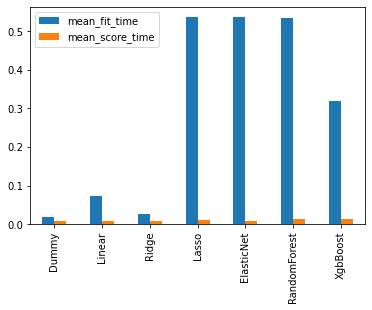

In [18]:
Results_time.plot.bar()

D'un point de vue performance, le XgbBoost est le meilleur, mais du point de vue temps, les autres modèles sont bien plus optimiaux. Ici nous ne nous limiterons pas au temps et selctionnerons ce modèle. Nous pouvons chercher à optimiser d'autant plus les hyperparamètres de notre modèle .

In [19]:
gbm_param_grid = {
    'gbm__learning_rate': [0.01, 0.1 , 1],
    'gbm__colsample_bytree': [0.3, 0.7,1],
    'gbm__n_estimators': [10,20,50,100],
    'gbm__max_depth': [2,5,7]
}

gbm = Pipeline(steps = [('prep',preprocessor),
                                ('gbm', xgb.XGBRegressor())])

grid_xgb = GridSearchCV(gbm,param_grid= gbm_param_grid,scoring
="r2",cv=4,verbose=1,return_train_score=True)



grid_xgb.fit(X_train,y_train)


Fitting 4 folds for each of 108 candidates, totalling 432 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ('Latitude',
                                                                          'Longitude',
                                                                          'YearBuilt',
                                                                          'NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'SecondLargestPropertyUseTypeGFA...
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None,
                                                     reg_alpha=None,
                                                     reg_lambda=None, ...))]),
             param_grid={'gbm__colsample_bytree': [0.3, 0.7, 1],
                         'gbm__learning_rate': [0.01, 0.1, 1],
                         'gbm__max_depth': [2, 5, 7],
                         'gbm__n_estimators': [10, 20, 50, 100]},
             return_train_score=True, scoring='r2', verbose=1)

In [35]:
hyperparam_score = pd.DataFrame(grid_xgb.cv_results_)
hyperparam_score['param'] = hyperparam_score.params.apply(lambda x : str(tuple(x.values())))
grid_xgb.best_params_

{'gbm__colsample_bytree': 0.3,
 'gbm__learning_rate': 0.1,
 'gbm__max_depth': 2,
 'gbm__n_estimators': 100}

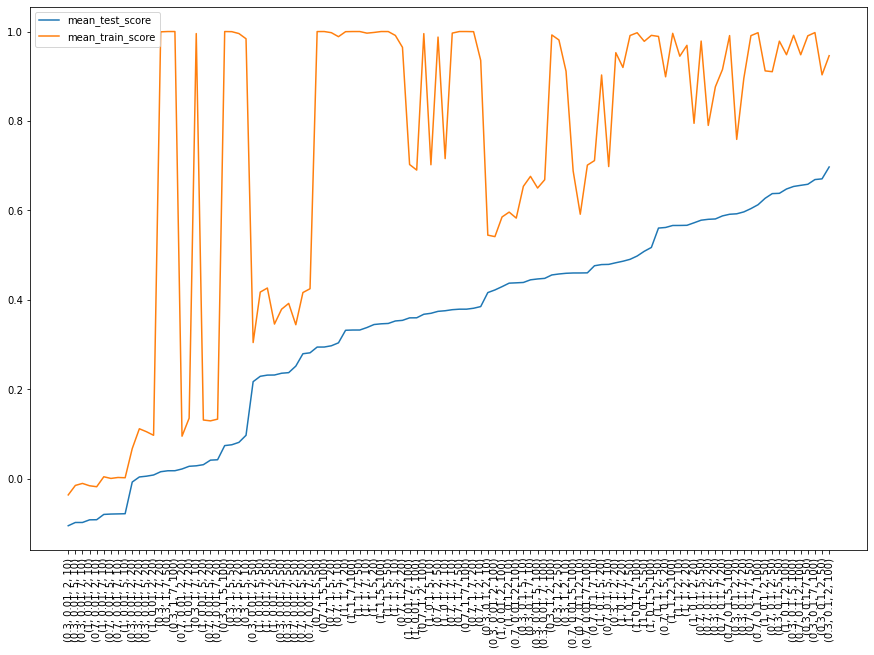

In [38]:
figure = plt.subplots(figsize=(15,10))
hyperparam_score = hyperparam_score.sort_values('mean_test_score')
plt.plot(hyperparam_score['param'],hyperparam_score['mean_test_score'],label='mean_test_score')
plt.plot(hyperparam_score['param'],hyperparam_score['mean_train_score'],label='mean_train_score')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [20]:
grid_xgb.best_params_

{'gbm__colsample_bytree': 0.3,
 'gbm__learning_rate': 0.1,
 'gbm__max_depth': 2,
 'gbm__n_estimators': 100}

Nous avons sélectionné nos hyperparamètres , nous allons regarder l'importances de nos variables.

In [21]:
pipe_final = Pipeline(steps = [('prep',preprocessor),
                                ('gbm', xgb.XGBRegressor(colsample_bytree= 1,learning_rate = 0.1,
                                                         max_depth = 5, n_estimators =  100))])
pipe_final.fit(X_train,y_train)
pipe_final[1]

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [22]:
print('R2 is' , pipe_final.score(X_train,y_train))
print('Rmse is' , Rmse(pipe_final.predict(X_train),y_train))


R2 is 0.987378881525104
Rmse is 2422745.7104226914


In [23]:
from sklearn.inspection import permutation_importance
train_result = permutation_importance(
    pipe_final, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
test_results = permutation_importance(
    pipe_final, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_importances_idx = train_result.importances_mean.argsort()

train_importances = pd.DataFrame(
    train_result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

for name, importances in zip(["train", "test"], [train_importances, test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()



Nous voyons que le jeu d'entraînant ne permet pas de définir l'importance de la même façon qu'avec notre jeu de test. Nous sélectionnerons les variables suivantes : 
'Longitude', 'YearBuilt','NumberofBuildings', 'PropertyGFATotal', 'PropertyGFABuilding(s)',
'LargestPropertyUseTypeGFA','Source_Cat','PrimaryPropertyType','LargestPropertyUseType',
'ENERGYSTARScore'. Egalement nous allons voir la différnece sans l'EnergyStarScore.

In [24]:
preprocessor_red = make_column_transformer(
    (num_proc, ( 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA')), (cat_proc, ('Source_Cat','Neighborhood',
'PrimaryPropertyType','LargestPropertyUseType','SecondLargestPropertyUseType',
                                                       'ThirdLargestPropertyUseType'))
)

pipe_red_final = Pipeline(steps = [('prep',preprocessor_red),
                                ('gbm', xgb.XGBRegressor(colsample_bytree= 0.7, max_depth = 2, 
                                                         n_estimators =  50))])

X_red_train = X_train.drop('ENERGYSTARScore',axis=1)
pipe_red_final.fit(X_red_train,y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ('Latitude', 'Longitude',
                                                   'YearBuilt',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'LargestPropertyUseTypeGFA',
                                                   'SecondLargestPropertyUseTypeGFA',
                                                   'ThirdLargestPropertyUseTy...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=2, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=50, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [25]:
preprocessor_red_select = make_column_transformer(
    (num_proc, ( 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA')), (cat_proc, ('PrimaryPropertyType',
                                                       'LargestPropertyUseType'))
)

pipe_red_select_final = Pipeline(steps = [('prep',preprocessor_red_select),
                                ('gbm', xgb.XGBRegressor(colsample_bytree= 0.7, max_depth = 2, 
                                                         n_estimators =  50))])

X_red_select_train = X_train.drop(['ENERGYSTARScore', 'Latitude',
                            'NumberofFloors','Neighborhood','SecondLargestPropertyUseType',
                            'ThirdLargestPropertyUseType','SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA','Source_Cat','PropertyGFAParking'],axis=1)
pipe_red_select_final.fit(X_red_select_train,y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ('Longitude', 'YearBuilt',
                                                   'NumberofBuildings',
                                                   'PropertyGFATotal',
                                                   'PropertyGFABuilding(s)',
                                                   'LargestPropertyUseTypeGFA')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ('PrimaryPropertyT...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=2, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=50, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [26]:
preprocessor_select = make_column_transformer(
    (num_proc, ( 'ENERGYSTARScore', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA')), (cat_proc, ('Source_Cat','PrimaryPropertyType',
                                                       'LargestPropertyUseType'))
)

pipe_select_final = Pipeline(steps = [('prep',preprocessor_select),
                                ('gbm', xgb.XGBRegressor(colsample_bytree= 0.7, max_depth = 2, 
                                                         n_estimators =  50))])

X_select_train = X_train.drop([ 'Latitude',
                            'NumberofFloors','Neighborhood','SecondLargestPropertyUseType',
                            'ThirdLargestPropertyUseType','SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA','PropertyGFAParking'],axis=1)
pipe_select_final.fit(X_select_train,y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ('ENERGYSTARScore',
                                                   'Longitude', 'YearBuilt',
                                                   'NumberofBuildings',
                                                   'PropertyGFATotal',
                                                   'PropertyGFABuilding(s)',
                                                   'LargestPropertyUseTypeGFA')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=2, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=50, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

Nous visualisons le r2 et le rmse de notre modèle sur les différentes selection de variable.

In [36]:
figure,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].bar(['All features','No_EnergyStarScore',
             'No_EnergyStarScore_selected_features','Selected_features'],
            [pipe_final.score(X_train,y_train),
             pipe_red_final.score(X_red_train,y_train),
             pipe_red_select_final.score(X_red_select_train,y_train),
             pipe_select_final.score(X_select_train,y_train)             
            ])
axes[1].bar(['All features','No_EnergyStarScore',
             'No_EnergyStarScore_selected_features','Selected_features'],
            [Rmse(pipe_final.predict(X_train),y_train),
             Rmse(pipe_red_final.predict(X_train),y_train),
             Rmse(pipe_red_select_final.predict(X_red_select_train),y_train),
             Rmse(pipe_select_final.predict(X_select_train),y_train)
            ])
axes[0].tick_params(rotation=90)
axes[1].tick_params(rotation=90)


Nous voyons que l'EnergyStarScore minimise l'erreur moyenne et donne un meilleur r2.La même chose se passe en réduisant le nombre de variable. Par contre, le changelent ne semble pas très significatif lorsque nous enlevons l'EnergyStarScore de nos variables sélectionnées.
Regardons comment évolue notre erreur en fonction de  'PrimaryPropertyType','Neighborhood',
'LargestPropertyUseType','Source_Cat'.

In [28]:
figure,axes = plt.subplots(2,2,figsize=(15,15))
y_pred = pipe_final.predict(X_train)
data_error =X_train.copy()
data_error['error'] = (y_pred - y_train)/y_train
sns.boxplot(data=data_error,y='error',x='PrimaryPropertyType',ax=axes[0,0])
sns.boxplot(data = data_error , y='error',x = 'Neighborhood',ax=axes[0,1])

sns.boxplot(data=data_error,y='error',x='LargestPropertyUseType',ax=axes[1,0])
sns.boxplot(data = data_error , y='error',x = 'Source_Cat',ax=axes[1,1])

axes[0,0].tick_params(rotation=90)
axes[0,1].tick_params(rotation=90)
axes[1,0].tick_params(rotation=90)
axes[1,1].tick_params(rotation=90)

plt.show()

Nous voyons que certainnes catégories ont une marge d'erreur plus importante que les autres. Nous pouvons rajouter un facteur d'erreur manuellementpour compenser cela. Testons notre modèle final

In [29]:
r2_final = pipe_final.score(X_test,y_test)
rmse_final = Rmse(pipe_final.predict(X_test),y_test)

print('r2 is',r2_final)
print('Rmse is',rmse_final)

r2 is 0.7698470979986496
Rmse is 5752462.064892365
